In [75]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Download the codeSearchNetChallenge dataset 
_If needed_

In [2]:
%run downloading_cleaning_codeSearchNetChallenge_dataset.ipynb

CodeSearchNet challenge dataset ready to use!


## Exporting the codeSearchNetChallenge dataset to CSV files

_If needed_

In [3]:
%run preparing_csv_files_from_codeSearchNetChallenge_dataset.ipynb

Total lines of Python code in the dataset (after removing empty lines)
11206193


Total lines of Python code in the dataset's train folder (after removing empty lines)
10054266


Total lines of Python in the dataset's test folder (after removing empty lines)
541338


Total lines of Python in the dataset's valid folder
610589


Source: https://dev.fast.ai/tutorial.transformers

In [4]:
import torch
torch.cuda.set_device(1)
print ('Current cuda device ', torch.cuda.current_device())

Current cuda device  1


In [5]:
from transformers import RobertaForMaskedLM, RobertaTokenizerFast

In [6]:
pretrained_weights = 'roberta-base'
tokenizer = RobertaTokenizerFast.from_pretrained(pretrained_weights)
model = RobertaForMaskedLM.from_pretrained(pretrained_weights)

Some weights of RobertaForMaskedLM were not initialized from the model checkpoint at roberta-base and are newly initialized: ['lm_head.decoder.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
ids = tokenizer.encode('This is an example of text, and')
ids

[0, 713, 16, 41, 1246, 9, 2788, 6, 8, 2]

In [8]:
tokenizer.decode(ids)

'<s>This is an example of text, and</s>'

In [9]:
import torch
t = torch.LongTensor(ids)[None]
preds = model.generate(t)

In [10]:
preds.shape,preds[0]

(torch.Size([1, 11]),
 tensor([   0,  713,   16,   41, 1246,    9, 2788,    6,    8,    2,    2]))

In [11]:
tokenizer.decode(preds[0].numpy())

'<s>This is an example of text, and</s></s>'

In [12]:
from fastai2.text.all import *

In [13]:
codeSearchNet_challenge_path = './CodeSearchNet_challenge_dataset'
all_csv_path = './CodeSearchNet_challenge_dataset/CodeSearchNet_challenge_dataset.csv'
train_csv_path = './CodeSearchNet_challenge_dataset/python/final/jsonl/train/train_CodeSearchNet_challenge_dataset.csv'
test_csv_path = './CodeSearchNet_challenge_dataset/python/final/jsonl/test/test_CodeSearchNet_challenge_dataset.csv'
valid_csv_path = './CodeSearchNet_challenge_dataset/python/final/jsonl/valid/valid_CodeSearchNet_challenge_dataset.csv'

In [14]:
df_train = pd.read_csv(train_csv_path)
df_valid = pd.read_csv(test_csv_path)
df_train.head()

,filename,text
0,CodeSearchNet_challenge_dataset/python/final/jsonl/train/python_train_11.py,"def show_slug_with_level(context, page, lang=None, fallback=True):\n """"""Display slug with level by language.""""""\n if not lang:\n lang = context.get('lang', pages_settings.PAGE_DEFAULT_LANGUAGE)\n\n page = get_page_from_string_or_id(page, lang)\n if not page:\n return ''\n\n return {'content': page.slug_with_level(lang)}\n\n\ndef show_revisions(context, page, content_type, lang=None):\n """"""Render the last 10 revisions of a page content with a list using\n the ``pages/revisions.html`` template""""""\n if not pages_settings.PAGE_CONTENT_REVISION:\n ..."
1,CodeSearchNet_challenge_dataset/python/final/jsonl/train/python_train_8.py,"def public(self):\n """"""True if the Slot is public.""""""\n return bool(lib.EnvSlotPublicP(self._env, self._cls, self._name))\n\n\ndef initializable(self):\n """"""True if the Slot is initializable.""""""\n return bool(lib.EnvSlotInitableP(self._env, self._cls, self._name))\n\n\ndef writable(self):\n """"""True if the Slot is writable.""""""\n return bool(lib.EnvSlotWritableP(self._env, self._cls, self._name))\n\n\ndef accessible(self):\n """"""True if the Slot is directly accessible.""""""\n return bool(lib.EnvSlotDirectAccessP(self._env, self._cls, self._name))\n\n\ndef types(self):\n ..."
2,CodeSearchNet_challenge_dataset/python/final/jsonl/train/python_train_1.py,"def zmq_device(self):\n '''\n Multiprocessing target for the zmq queue device\n '''\n self.__setup_signals()\n salt.utils.process.appendproctitle('MWorkerQueue')\n self.context = zmq.Context(self.opts['worker_threads'])\n # Prepare the zeromq sockets\n self.uri = 'tcp://{interface}:{ret_port}'.format(**self.opts)\n self.clients = self.context.socket(zmq.ROUTER)\n if self.opts['ipv6'] is True and hasattr(zmq, 'IPV4ONLY'):\n # IPv6 sockets work for both IPv6 and IPv4 addresses\n self.clients.setsockopt(zmq.IPV4ONLY, 0)\n self.clients.setsockopt(..."
3,CodeSearchNet_challenge_dataset/python/final/jsonl/train/python_train_13.py,"def get_datetime_sorted_rows(dbconn, table_name, uuid=None, column=None):\n """"""\n Get a list of datetime sorted rows from a table in the database\n :param dbconn: database connection\n :param table_name: name of table in the database\n :param uuid: optional uuid to pull from\n :param column: optional column/field in the table to pull instead of rows\n :returns: a list of tuples containing (datetime, row) pairs or (datetime, column) pairs if columns is specified.\n """"""\n rows = get_rows(dbconn, table_name, uuid=uuid)\n data = []\n for r in rows:\n dt ..."
4,CodeSearchNet_challenge_dataset/python/final/jsonl/train/python_train_5.py,"def export_ruptures_csv(ekey, dstore):\n """"""\n :param ekey: export key, i.e. a pair (datastore key, fmt)\n :param dstore: datastore object\n """"""\n oq = dstore['oqparam']\n if 'scenario' in oq.calculation_mode:\n return []\n dest = dstore.export_path('ruptures.csv')\n header = ('rupid multiplicity mag centroid_lon centroid_lat '\n 'centroid_depth trt strike dip rake boundary').split()\n rows = []\n for rgetter in gen_rupture_getters(dstore):\n rups = rgetter.get_ruptures()\n rup_data = calc.RuptureData(rgetter.trt, rgetter.rlzs..."


In [15]:
df_train = df_train[["text"]]
df_valid = df_valid[["text"]]

display(df_train.head())
display(df_valid.head())

,text
0,"def show_slug_with_level(context, page, lang=None, fallback=True):\n """"""Display slug with level by language.""""""\n if not lang:\n lang = context.get('lang', pages_settings.PAGE_DEFAULT_LANGUAGE)\n\n page = get_page_from_string_or_id(page, lang)\n if not page:\n return ''\n\n return {'content': page.slug_with_level(lang)}\n\n\ndef show_revisions(context, page, content_type, lang=None):\n """"""Render the last 10 revisions of a page content with a list using\n the ``pages/revisions.html`` template""""""\n if not pages_settings.PAGE_CONTENT_REVISION:\n ..."
1,"def public(self):\n """"""True if the Slot is public.""""""\n return bool(lib.EnvSlotPublicP(self._env, self._cls, self._name))\n\n\ndef initializable(self):\n """"""True if the Slot is initializable.""""""\n return bool(lib.EnvSlotInitableP(self._env, self._cls, self._name))\n\n\ndef writable(self):\n """"""True if the Slot is writable.""""""\n return bool(lib.EnvSlotWritableP(self._env, self._cls, self._name))\n\n\ndef accessible(self):\n """"""True if the Slot is directly accessible.""""""\n return bool(lib.EnvSlotDirectAccessP(self._env, self._cls, self._name))\n\n\ndef types(self):\n ..."
2,"def zmq_device(self):\n '''\n Multiprocessing target for the zmq queue device\n '''\n self.__setup_signals()\n salt.utils.process.appendproctitle('MWorkerQueue')\n self.context = zmq.Context(self.opts['worker_threads'])\n # Prepare the zeromq sockets\n self.uri = 'tcp://{interface}:{ret_port}'.format(**self.opts)\n self.clients = self.context.socket(zmq.ROUTER)\n if self.opts['ipv6'] is True and hasattr(zmq, 'IPV4ONLY'):\n # IPv6 sockets work for both IPv6 and IPv4 addresses\n self.clients.setsockopt(zmq.IPV4ONLY, 0)\n self.clients.setsockopt(..."
3,"def get_datetime_sorted_rows(dbconn, table_name, uuid=None, column=None):\n """"""\n Get a list of datetime sorted rows from a table in the database\n :param dbconn: database connection\n :param table_name: name of table in the database\n :param uuid: optional uuid to pull from\n :param column: optional column/field in the table to pull instead of rows\n :returns: a list of tuples containing (datetime, row) pairs or (datetime, column) pairs if columns is specified.\n """"""\n rows = get_rows(dbconn, table_name, uuid=uuid)\n data = []\n for r in rows:\n dt ..."
4,"def export_ruptures_csv(ekey, dstore):\n """"""\n :param ekey: export key, i.e. a pair (datastore key, fmt)\n :param dstore: datastore object\n """"""\n oq = dstore['oqparam']\n if 'scenario' in oq.calculation_mode:\n return []\n dest = dstore.export_path('ruptures.csv')\n header = ('rupid multiplicity mag centroid_lon centroid_lat '\n 'centroid_depth trt strike dip rake boundary').split()\n rows = []\n for rgetter in gen_rupture_getters(dstore):\n rups = rgetter.get_ruptures()\n rup_data = calc.RuptureData(rgetter.trt, rgetter.rlzs..."


,text
0,"def get_vid_from_url(url):\n """"""Extracts video ID from URL.\n """"""\n return match1(url, r'youtu\.be/([^?/]+)') or \\n match1(url, r'youtube\.com/embed/([^/?]+)') or \\n match1(url, r'youtube\.com/v/([^/?]+)') or \\n match1(url, r'youtube\.com/watch/([^/?]+)') or \\n parse_query_param(url, 'v') or \\n parse_query_param(parse_query_param(url, 'u'), 'v')\n\n\ndef sina_xml_to_url_list(xml_data):\n """"""str->list\n Convert XML to URL List.\n From Biligrab.\n """"""\n rawurl = []\n dom = parseString(xml_data)\n for node in dom.getElement..."


In [16]:
all_texts = np.concatenate([df_train["text"].values, df_valid["text"].values])

In [17]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [18]:
splits = [list(range_of(df_train)), list(range(len(df_train), len(all_texts)))]
tls = TfmdLists(all_texts, TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)

In [19]:
tls.train[0],tls.valid[0]

(tensor([ 9232,   311,  1215,  ..., 43163,    43, 50118]),
 tensor([ 9232,   120,  1215,  ...,  1215, 25867, 50118]))

In [20]:
tls.tfms(tls.train.items[0]).shape, tls.tfms(tls.valid.items[0]).shape

(torch.Size([11983775]), torch.Size([10037601]))

In [21]:
show_at(tls.train, 0)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [22]:
show_at(tls.valid, 0)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [23]:
bs,sl = 8,512
dls = tls.dataloaders(bs=bs, seq_len=sl)

In [24]:
dls.show_batch(max_n=5)

,text,text_
0,"def show_clock_output_clock_time_timezone(self, **kwargs):\n """"""Auto Generated Code\n """"""\n config = ET.Element(""config"")\n show_clock = ET.Element(""show_clock"")\n config = show_clock\n output = ET.SubElement(show_clock, ""output"")\n clock_time = ET.SubElement(output, ""clock-time"")\n timezone = ET.SubElement(clock_time, ""timezone"")\n timezone.text = kwargs.pop('timezone')\n\n callback = kwargs.pop('callback', self._callback)\n return callback(config)\n\n\ndef get_system_uptime_input_rbridge_id(self, **kwargs):\n """"""Auto Generated Code\n """"""\n config = ET.Element(""config"")\n get_system_uptime = ET.Element(""get_system_uptime"")\n config = get_system_uptime\n input = ET.SubElement(get_system_uptime, ""input"")\n rbridge_id = ET.SubElement(input, ""rbridge-id"")\n rbridge_id.text = kwargs.pop('rbridge_id')\n\n callback = kwargs.pop('callback', self._callback)\n return callback(config)\n\n\ndef get_system_uptime_output_show_system_uptime_rbridge_id(self, **kwargs):\n """"""Auto Generated Code\n """"""\n config = ET.Element(""config"")\n","show_clock_output_clock_time_timezone(self, **kwargs):\n """"""Auto Generated Code\n """"""\n config = ET.Element(""config"")\n show_clock = ET.Element(""show_clock"")\n config = show_clock\n output = ET.SubElement(show_clock, ""output"")\n clock_time = ET.SubElement(output, ""clock-time"")\n timezone = ET.SubElement(clock_time, ""timezone"")\n timezone.text = kwargs.pop('timezone')\n\n callback = kwargs.pop('callback', self._callback)\n return callback(config)\n\n\ndef get_system_uptime_input_rbridge_id(self, **kwargs):\n """"""Auto Generated Code\n """"""\n config = ET.Element(""config"")\n get_system_uptime = ET.Element(""get_system_uptime"")\n config = get_system_uptime\n input = ET.SubElement(get_system_uptime, ""input"")\n rbridge_id = ET.SubElement(input, ""rbridge-id"")\n rbridge_id.text = kwargs.pop('rbridge_id')\n\n callback = kwargs.pop('callback', self._callback)\n return callback(config)\n\n\ndef get_system_uptime_output_show_system_uptime_rbridge_id(self, **kwargs):\n """"""Auto Generated Code\n """"""\n config = ET.Element(""config"")\n"
1,"through. This will succeed where the previous connection fails under\n the conditions of REMOTE_USER and galaxy running under uWSGI.\n """"""\n history_id = history_id or os.environ['HISTORY_ID']\n key = os.environ['API_KEY']\n\n ### Customised/Raw galaxy_url ###\n galaxy_ip = _get_ip()\n # Substitute $DOCKER_HOST with real IP\n url = Template(os.environ['GALAXY_URL']).safe_substitute(\n {'DOCKER_HOST': galaxy_ip})\n gi = _test_url(url, key, history_id, obj=obj)\n if gi is not None:\n return gi\n\n ### Failover, fully auto-detected URL ###\n # Remove trailing slashes\n app_path = os.environ['GALAXY_URL'].rstrip('/')\n # Remove protocol+host:port if included\n app_path = ''.join(app_path.split('/')[3:])\n\n if","through. This will succeed where the previous connection fails under\n the conditions of REMOTE_USER and galaxy running under uWSGI.\n """"""\n history_id = history_id or os.environ['HISTORY_ID']\n key = os.environ['API_KEY']\n\n ### Customised/Raw galaxy_url ###\n galaxy_ip = _get_ip()\n # Substitute $DOCKER_HOST with real IP\n url = Template(os.environ['GALAXY_URL']).safe_substitute(\n {'DOCKER_HOST': galaxy_ip})\n gi = _test_url(url, key, history_id, obj=obj)\n if gi is not None:\n return gi\n\n ### Failover, fully auto-detected URL ###\n # Remove trailing slashes\n app_path = os.environ['GALAXY_URL'].rstrip('/')\n # Remove protocol+host:port if included\n app_path = ''.join(app_path.split('/')[3:])\n\n if 'GALAXY_WEB_PORT'"
2,"\n """"""\n # decode the seed\n seed = encoder.decode(seed)\n # Verify the given seed type and size are correct\n if not (isinstance(seed, bytes) and len(seed) == cls.SEED_SIZE):\n raise exc.TypeError((""PrivateKey seed must be a {0} bytes long ""\n ""binary sequence"").format(cls.SEED_SIZE)\n )\n # generate a raw keypair from the given seed\n raw_pk, raw_sk = nacl.bindings.

In [25]:
def tokenize(text):
    toks = tokenizer.tokenize(text)
    return tensor(tokenizer.convert_tokens_to_ids(toks))

tokenized = [tokenize(t) for t in progress_bar(all_texts)]

In [26]:
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        return x if isinstance(x, Tensor) else tokenize(x)
        
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

In [27]:
tls = TfmdLists(tokenized, TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)
dls = tls.dataloaders(bs=bs, seq_len=sl)

In [28]:
dls.show_batch(max_n=5)

,text,text_
0,"async def ensure_open(self) -> None:\n """"""\n Check that the WebSocket connection is open.\n\n Raise :exc:`~websockets.exceptions.ConnectionClosed` if it isn't.\n\n """"""\n # Handle cases from most common to least common for performance.\n if self.state is State.OPEN:\n # If self.transfer_data_task exited without a closing handshake,\n # self.close_connection_task may be closing it, going straight\n # from OPEN to CLOSED.\n if self.transfer_data_task.done():\n await asyncio.shield(self.close_connection_task)\n raise ConnectionClosed(\n self.close_code, self.close_reason\n","ync def ensure_open(self) -> None:\n """"""\n Check that the WebSocket connection is open.\n\n Raise :exc:`~websockets.exceptions.ConnectionClosed` if it isn't.\n\n """"""\n # Handle cases from most common to least common for performance.\n if self.state is State.OPEN:\n # If self.transfer_data_task exited without a closing handshake,\n # self.close_connection_task may be closing it, going straight\n # from OPEN to CLOSED.\n if self.transfer_data_task.done():\n await asyncio.shield(self.close_connection_task)\n raise ConnectionClosed(\n self.close_code, self.close_reason\n"
1,"mq_channel.queue_delete(queue=self._hb_response_q)\n mq_channel.queue_delete(queue=self._hb_request_q)\n\n mq_connection.close()\n\n\ndef terminate_manager(self):\n """"""\n **Purpose**: Method to terminate the tmgr process. This method is\n blocking as it waits for the tmgr process to terminate (aka join).\n """"""\n\n try:\n\n if self._tmgr_process:\n\n if not self._tmgr_terminate.is_set():\n self._tmgr_terminate.set()\n\n if self.check_manager():\n self._tmgr_process.join()\n\n","mq_channel.queue_delete(queue=self._hb_response_q)\n mq_channel.queue_delete(queue=self._hb_request_q)\n\n mq_connection.close()\n\n\ndef terminate_manager(self):\n """"""\n **Purpose**: Method to terminate the tmgr process. This method is\n blocking as it waits for the tmgr process to terminate (aka join).\n """"""\n\n try:\n\n if self._tmgr_process:\n\n if not self._tmgr_terminate.is_set():\n self._tmgr_terminate.set()\n\n if self.check_manager():\n self._tmgr_process.join()\n\n"
2,"XTY, XTDY, XTFY, X0TX0, X0TDX0, X0TFX0,\n XTX0, XTDX0, XTFX0, X0TY, X0TDY, X0TFY,\n current_logSNR2, l_idx, n_C,\n n_T, n_V, n_run, n_X0, idx_param_fitU, rank),\n method=self.optimizer, jac=True, tol=tol,\n options=self.minimize_options)\n current_vec_U_chlsk_l = \\n res_fitU.x[idx_param_fitU['Cholesky']]\n current_a1 = res_fitU.x[idx_param_fitU['a1']]\n norm_fitUchange = np.linalg.norm(res_fitU.x - param0_fitU)\n","XTY, XTDY, XTFY, X0TX0, X0TDX0, X0TFX0,\n XTX0, XTDX0, XTFX0, X0TY, X0TDY, X0TFY,\n current_logSNR2, l_idx, n_C,\n n_T, n_V, n_run, n_X0, idx_param_fitU, rank),\n method=self.optimizer, jac=True, tol=tol,\n options=self.minimize_options)\n current_vec_U_chlsk_l = \\n res_fitU.x[idx_param_fitU['Cholesky']]\n current_a1 = res_fitU.x[idx_param_fitU['a1']]\n norm_fitUchange = np.linalg.norm(res_fitU.x - param0_fitU)\n"
3,"_attention.attention_bias_lower_triangle(\n common_layers.shape_list(targets)[1]))\n decoder_input = common_layers.shift_right_3d(targets)\n if hparams.pos == ""timing"":\n decoder_input = common_attention.add_timing_signal_1d(decoder_input)\n return (decoder_input, decoder_self_attention_bias)\n\n\ndef attention_lm_decoder(decoder_input,\n decoder_self_attention_bias,\n hparams,\n name=""decoder""):\n """"""A stack of attention_lm layers.\n\n Args:\n decoder_input: a Tensor\n decoder_self_attention_bias: bias Tensor","attention.attention_bias_lower_triangle(\n common_layers.shape_list(targets)[1]))\n decoder_input = common_layers.shift_right_3d(targets)\n if hparams.pos == ""timing"":\n decoder_input = common_attention.add_timing_signal_1d(decoder_input)\n return (decoder_input, decoder_self_attention_bias)\n\n\ndef attention_lm_decoder(decoder_input,\n decoder_self_attention_bias,\n hparams,\n name=""decoder""):\n """"""A stack of attention_lm layers.\n\n Args:\n decoder_input: a 

In [29]:
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.pred[0]

In [30]:
learn = Learner(dls, model, 
                loss_func=CrossEntropyLossFlat(), 
                cbs=[DropOutput,TerminateOnNaNCallback()], 
                metrics=[Perplexity(),accuracy]
               ).to_fp16()

In [31]:
learn.validate()

(#3) [15.721566200256348,6726504.5,0.3398023843765259]

In [32]:
print(learn.model)

RobertaForMaskedLM(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [33]:
print(learn.summary()) 

RobertaForMaskedLM (Input shape: ['8 x 512'])
Layer (type)         Output Shape         Param #    Trainable 
Embedding            8 x 512 x 768        38,603,520 True      
________________________________________________________________
Embedding            8 x 512 x 768        394,752    True      
________________________________________________________________
Embedding            8 x 512 x 768        768        True      
________________________________________________________________
LayerNorm            8 x 512 x 768        1,536      True      
________________________________________________________________
Dropout              8 x 512 x 768        0          False     
________________________________________________________________
Linear               8 x 512 x 768        590,592    True      
________________________________________________________________
Linear               8 x 512 x 768        590,592    True      
____________________________________________________

SuggestedLRs(lr_min=0.00020892962347716094, lr_steep=9.999999747378752e-06)

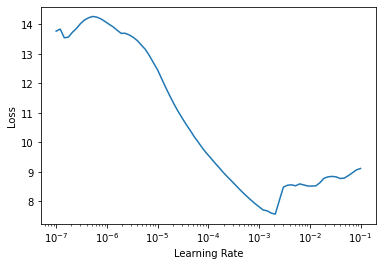

In [34]:
learn.lr_find()

In [36]:
learn.fit_one_cycle(1, 1e-5)

epoch,train_loss,valid_loss,perplexity,accuracy,time
0,0.016402,0.003944,1.003952,0.999346,3:09:52


In [37]:
df_valid.head(1)

,text
0,"def get_vid_from_url(url):\n """"""Extracts video ID from URL.\n """"""\n return match1(url, r'youtu\.be/([^?/]+)') or \\n match1(url, r'youtube\.com/embed/([^/?]+)') or \\n match1(url, r'youtube\.com/v/([^/?]+)') or \\n match1(url, r'youtube\.com/watch/([^/?]+)') or \\n parse_query_param(url, 'v') or \\n parse_query_param(parse_query_param(url, 'u'), 'v')\n\n\ndef sina_xml_to_url_list(xml_data):\n """"""str->list\n Convert XML to URL List.\n From Biligrab.\n """"""\n rawurl = []\n dom = parseString(xml_data)\n for node in dom.getElement..."


In [38]:
# learn.save('fine_tuned')
learn.save('20200824_fit_head_roberta_model')

In [39]:
learn.load('20200824_fit_head_roberta_model');

In [40]:
prompt = "A unicorn is a magical creature with a rainbow tail and a horn"

In [41]:
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape

torch.Size([1, 15])

In [42]:
preds = learn.model.generate(inp, max_length=40, num_beams=5, temperature=1.5)

In [43]:
tokenizer.decode(preds[0].cpu().numpy())
# tokenizer.decode(preds[0])

'<s>A unicorn is a magical creature with a rainbow tail and a horn</s>AAAAAAAAAAAAAAAAAAAAAAAAA'

In [44]:
preds

tensor([[    0,   250, 35545,    16,    10, 13867, 20397,    19,    10, 20927,
          7886,     8,    10, 21305,     2,   250,   250,   250,   250,   250,
           250,   250,   250,   250,   250,   250,   250,   250,   250,   250,
           250,   250,   250,   250,   250,   250,   250,   250,   250,   250]],
       device='cuda:1')

In [45]:
preds[0]

tensor([    0,   250, 35545,    16,    10, 13867, 20397,    19,    10, 20927,
         7886,     8,    10, 21305,     2,   250,   250,   250,   250,   250,
          250,   250,   250,   250,   250,   250,   250,   250,   250,   250,
          250,   250,   250,   250,   250,   250,   250,   250,   250,   250],
       device='cuda:1')

In [46]:
prompt = "import"
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape
preds = learn.model.generate(inp, max_length=40, num_beams=5, temperature=1.5)
tokenizer.decode(preds[0].cpu().numpy())

'<s>import</s>importimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimport'

In [50]:
prompt = "import <MASK> from"
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
inp.shape
preds = learn.model.generate(inp, max_length=40, num_beams=5, temperature=1.5)
tokenizer.decode(preds[0].cpu().numpy())

'<s>import <MASK> from</s>importimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimportimport'

In [60]:
_model_roberta = learn.model
# save tokenizer and model
model_path= '20200824_roberta-CodeSearchNet_fit_head'
!mkdir {model_path}
_model_roberta.save_pretrained(f"{str(model_path)}")
tokenizer.save_pretrained(f"{str(model_path)}")

('20200824_roberta-CodeSearchNet_fit_head/vocab.json',
 '20200824_roberta-CodeSearchNet_fit_head/merges.txt',
 '20200824_roberta-CodeSearchNet_fit_head/special_tokens_map.json',
 '20200824_roberta-CodeSearchNet_fit_head/added_tokens.json')

In [69]:
from transformers import pipeline

fill_mask = pipeline(
    "fill-mask",
    model="./20200824_roberta-CodeSearchNet_fit_head",
    tokenizer="./20200824_roberta-CodeSearchNet_fit_head"
)

fill_mask("from pandas import <mask>")

[{'sequence': '<s>from pandas import.</s>',
  'score': 0.9145868420600891,
  'token': 4,
  'token_str': '.'},
 {'sequence': '<s>from pandas import.</s>',
  'score': 0.015848614275455475,
  'token': 479,
  'token_str': 'Ġ.'},
 {'sequence': '<s>from pandas importfrom</s>',
  'score': 0.0070899128913879395,
  'token': 7761,
  'token_str': 'from'},
 {'sequence': '<s>from pandas import,</s>',
  'score': 0.0038756707217544317,
  'token': 6,
  'token_str': ','},
 {'sequence': '<s>from pandas import from</s>',
  'score': 0.0038681819569319487,
  'token': 31,
  'token_str': 'Ġfrom'}]

In [70]:
learn.unfreeze()

In [71]:
learn.fit_one_cycle(10, 1e-5)

epoch,train_loss,valid_loss,perplexity,accuracy,time
0,0.018979,0.003823,1.003831,0.999359,3:10:39
1,0.011861,0.003552,1.003558,0.999390,3:11:20
2,0.013500,0.003378,1.003384,0.999406,3:11:51
3,0.014181,0.003216,1.003221,0.999431,3:11:44
4,0.014843,0.003123,1.003128,0.999436,3:12:28
5,0.009306,0.003086,1.003091,0.999446,3:13:13
6,0.011828,0.003004,1.003009,0.999457,3:12:07
7,0.010157,0.002951,1.002956,0.999461,3:11:38
8,0.014581,0.002925,1.002929,0.999467,3:11:12
9,0.010569,0.002920,1.002925,0.999468,3:11:12


In [72]:
learn.save('20200824_fine_tuned_roberta_model')
_model_roberta_fine = learn.model
# save tokenizer and model
model_path= '20200824_roberta-CodeSearchNet-fine-tuned'
!mkdir {model_path}
_model_roberta_fine.save_pretrained(f"{str(model_path)}")
tokenizer.save_pretrained(f"{str(model_path)}")

('20200824_roberta-CodeSearchNet-fine-tuned/vocab.json',
 '20200824_roberta-CodeSearchNet-fine-tuned/merges.txt',
 '20200824_roberta-CodeSearchNet-fine-tuned/special_tokens_map.json',
 '20200824_roberta-CodeSearchNet-fine-tuned/added_tokens.json')

In [73]:
print(learn.summary()) 

RobertaForMaskedLM (Input shape: ['8 x 512'])
Layer (type)         Output Shape         Param #    Trainable 
Embedding            8 x 512 x 768        38,603,520 True      
________________________________________________________________
Embedding            8 x 512 x 768        394,752    True      
________________________________________________________________
Embedding            8 x 512 x 768        768        True      
________________________________________________________________
LayerNorm            8 x 512 x 768        1,536      True      
________________________________________________________________
Dropout              8 x 512 x 768        0          False     
________________________________________________________________
Linear               8 x 512 x 768        590,592    True      
________________________________________________________________
Linear               8 x 512 x 768        590,592    True      
____________________________________________________

In [74]:
from transformers import pipeline

fill_mask = pipeline(
    "fill-mask",
    model="./20200824_roberta-CodeSearchNet-fine-tuned",
    tokenizer="./20200824_roberta-CodeSearchNet-fine-tuned"
)

fill_mask("from pandas import <mask>")

[{'sequence': '<s>from pandas import\n</s>',
  'score': 0.6224209666252136,
  'token': 50118,
  'token_str': 'Ċ'},
 {'sequence': '<s>from pandas import.</s>',
  'score': 0.22222988307476044,
  'token': 4,
  'token_str': '.'},
 {'sequence': '<s>from pandas import </s>',
  'score': 0.038354743272066116,
  'token': 1437,
  'token_str': 'Ġ'},
 {'sequence': '<s>from pandas import\n\n</s>',
  'score': 0.028566861525177956,
  'token': 50140,
  'token_str': 'ĊĊ'},
 {'sequence': '<s>from pandas import.</s>',
  'score': 0.021909384056925774,
  'token': 479,
  'token_str': 'Ġ.'}]

In [76]:
from transformers import pipeline

text_generation = pipeline(
    "text-generation",
    model="./20200824_roberta-CodeSearchNet-fine-tuned",
    tokenizer="./20200824_roberta-CodeSearchNet-fine-tuned"
)

text_generation("from pandas import <mask>")

NotImplementedError: Generation is currently not supported for RobertaForMaskedLM. Please select a model from ['XLNetLMHeadModel', 'TransfoXLLMHeadModel', 'ReformerModelWithLMHead', 'GPT2LMHeadModel', 'OpenAIGPTLMHeadModel', 'CTRLLMHeadModel', 'TFXLNetLMHeadModel', 'TFTransfoXLLMHeadModel', 'TFGPT2LMHeadModel', 'TFOpenAIGPTLMHeadModel', 'TFCTRLLMHeadModel'] for generation.